In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [89]:
wafer=pd.read_csv(r'wafer_23012020_041211.csv')
wafer.head()


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [90]:
from sklearn.model_selection import train_test_split
wafers,wafers_test=train_test_split(wafer,test_size=0.2,random_state=42)

In [91]:
wafers.info

<bound method DataFrame.info of    Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
55  Wafer-856       NaN   2532.45  2191.1333  2197.6570    1.1569     100.0   
88  Wafer-889   3221.21   2391.20  2189.9667  1046.6212    0.8662     100.0   
26  Wafer-827   2951.85   2525.00  2189.5777  1320.3197    1.3459     100.0   
42  Wafer-843   2982.07   2447.06  2199.6334  1242.8420    1.4083     100.0   
69  Wafer-870   3058.08   2524.60  2192.3778  1110.5453    0.8147     100.0   
..        ...       ...       ...        ...        ...       ...       ...   
60  Wafer-861   3071.05   2642.15  2200.9889  1054.5240    1.3830     100.0   
71  Wafer-872   3043.18   2545.53  2192.3778  1110.5453    0.8147     100.0   
14  Wafer-815   3001.26   2519.92  2224.6778  1308.6479    1.3907     100.0   
92  Wafer-893   3007.00   2572.62  2213.2111  2070.7147    1.9705     100.0   
51  Wafer-852   3078.77   2533.04  2187.4111  1942.3069    1.1864     100.0   

    Sensor-7  Senso

In [92]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [93]:
wafers["Good/Bad"].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

In [94]:
wafers.isnull().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      2
Sensor-4      2
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [95]:
wafers["Good/Bad"].isnull().sum()

0

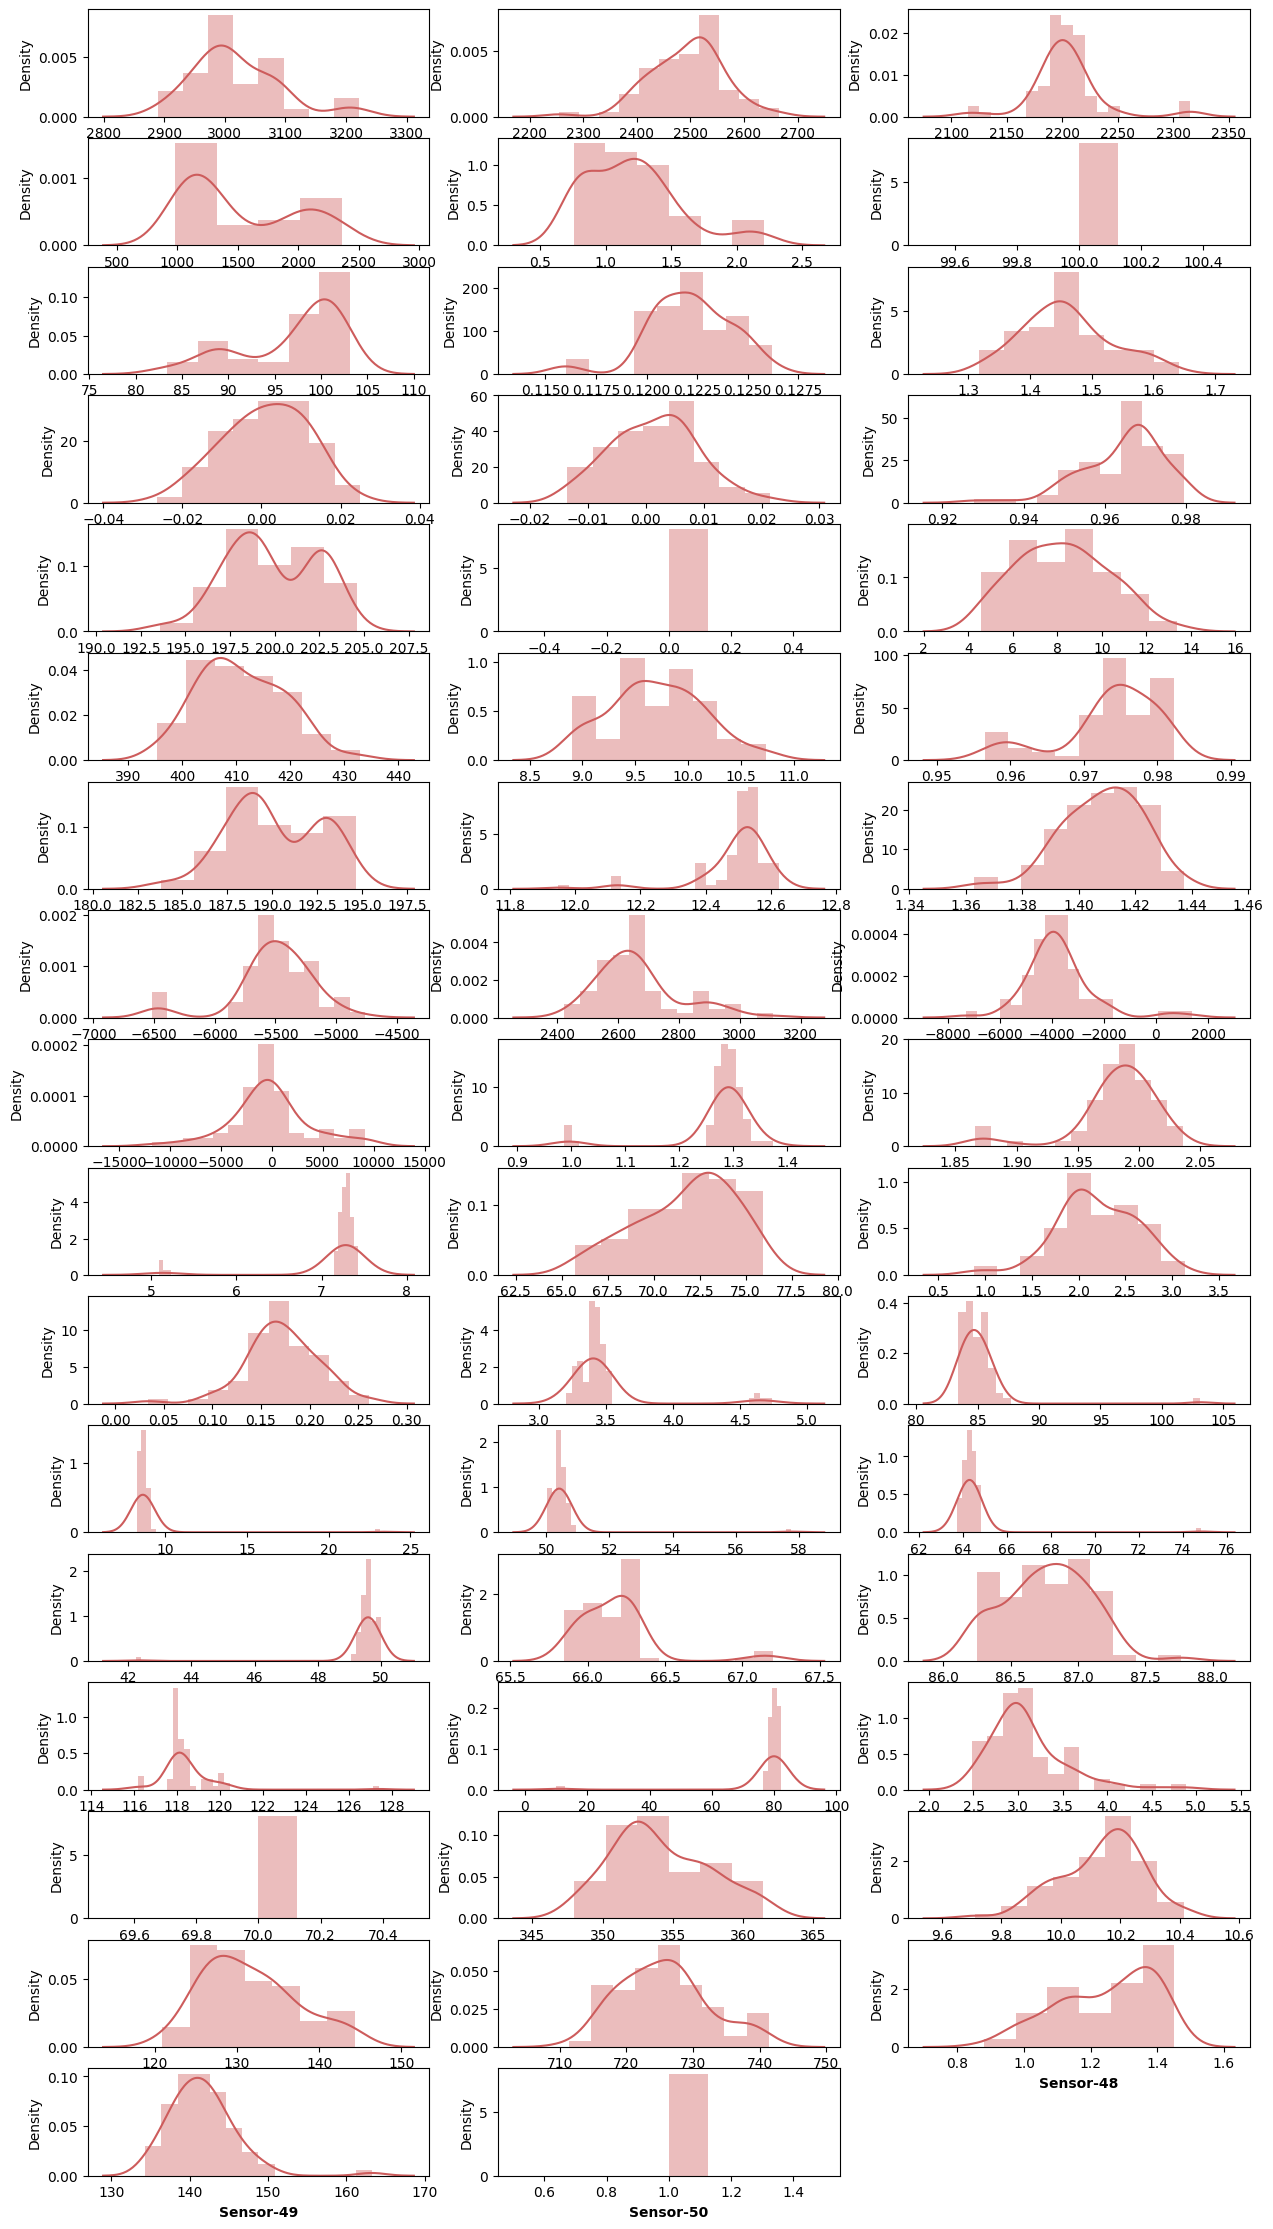

In [96]:
# visualisation of senson's distribution data

plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    #plt.tight_layout()

In [97]:
## enumerate
myList=[1,2,3,4,54]
for i in enumerate(myList):
    print(i)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 54)


In [98]:
## select 50 random sensors

random_50_sensors_idk = []
for i in range(50):
    if i not in random_50_sensors_idk:
        random_50_sensors_idk.append(np.random.randint(1,591))

In [99]:
## distribution of ramdo 

In [100]:
def get_cols_with_zero_std_dev(df:pd.DataFrame):

    # returns a list of columns names who are having zero standard deviatioan

    cols_to_drop=[]
    num_cols =[col for col in df.columns if df[col].dtypes !='o']   #numerical cols only
    for col in num_cols:
        if df[col].std()==0:
            cols_to_drop.append(col)
    return cols_to_drop


def get_redundant_cols(df:pd.DataFrame,missing_thresh=0.7):

    # returns a llist of columns having missing values more than certain thresh
    cols_missing_ratios =df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios>missing_thresh].index)
    return cols_to_drop


In [101]:
## columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers,missing_thresh=0.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [102]:
## columns with 0 std deviation
cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)

cols_to_drop_2 

TypeError: could not convert string to float: 'Wafer-856'

In [ ]:
x,y = wafers.drop(cols_to_drop_1,axis=1),wafers[['Good/Bad']]

In [ ]:
print("shape of the feature now", x.shape)
x.head()

shape of the feature now (80, 588)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [ ]:
x.drop["Unnamed:0" , axis=1]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2028923374.py, line 1)

In [ ]:
# independent/target variables
print("shape of the labels :",y.shape)
y.head()

shape of the labels : (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


In [ ]:
## data transformation
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline =Pipeline(
    steps=[
        ('Imputer',SimpleImputer()),('Scaler',RobustScaler())
    ]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', RobustScaler())])

In [ ]:
x.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
## transform wafer features
x_trans = preprocessing_pipeline.fit_transform(x)
print("shape of transformed feature set :",x_trans.shape)
x_trans

shape of transformed feature set : (80, 587)


array([[ 0.15785761,  0.37395233, -0.42964847, ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.48926049, -1.38644649, -0.4805917 , ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.61709673,  0.28110298, -0.4975786 , ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.04728269,  0.21779093,  1.03517686, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.01891307,  0.87459106,  0.5344476 , ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.84659075,  0.3813055 , -0.59218996, ..., -0.16129032,
        -0.20782888,  0.        ]])

In [ ]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\niket\onedrive\pictures\coding_vs\ml_basic_work\waferfaultdetection\env\lib\site-packages\src-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
from sklearn.cluster import KMeans
from kneed import keelLocator
from typing import Tuple
from dataclasses import dataclass



@dataclass
class ClusterDataInstances:
    

Resampling of data


In [103]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 187.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/235.6 kB 178.6 kB/s eta 0:00:02
   --------------- ----------------------- 92.2/235.6 kB 308.0 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 379.3 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 379.3 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 379.3 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 379.3 kB/s eta 0:00:01
   -------------------------------------  235.5/235.6 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 400.4 kB

DEPRECATION: Loading egg at c:\users\niket\onedrive\pictures\coding_vs\ml_basic_work\waferfaultdetection\env\lib\site-packages\src-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [104]:
from imblearn.combine import SMOTETomek
x,y = x_trans[: ,: -1],y
resampler = SMOTETomek(sampling_strategy="auto")
x_res,y_res = resampler.fit_resample(x,y)

In [105]:
## prepare test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_res,y_res,test_size=1/3,random_state=42)
print(f"train set : {x_train.shape,y_train.shape}")
print(f"test set :{x_test.shape,y_test.shape}")

train set : ((98, 586), (98, 1))
test set :((50, 586), (50, 1))
